In [1]:
import tweepy

In [2]:
import pandas as pd
pd.set_option('display.max_colwidth', 146)
from matplotlib import pyplot as plt

In [3]:
from datetime import datetime as dt
import pickle

In [4]:
at = lambda :dt.now().strftime("%Y%m%d%H%M")

In [5]:
at()

'201711161852'

In [6]:
consumer_key = 'FILL HERE'
consumer_secret = 'FILL HERE' 

access_token = 'FILL HERE'
access_token_secret = 'FILL HERE' 

In [7]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

## Get all tweets from 511 Central VA as of 13:40pm Oct 14

In [8]:
js = api.user_timeline('511centralva')
len(js)

20

In [9]:
while True:
    temp = api.user_timeline('511centralva', count=200, max_id=js[-1]._json['id'])
    if js[-1]._json['id'] == temp[-1]._json['id']:
        break
    else:
        js += temp
len(js), js[-1]._json['id']

(3267, 923533267948720128)

In [10]:
fname = 'data_' + at()+ '.pkl'
with open(fname , 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(js, f, pickle.HIGHEST_PROTOCOL)

In [39]:
fname

'data_201710141356.pkl'

In [11]:
fname

'data_201711161853.pkl'

In [95]:
## reading back

with open('data_201710141356.pkl', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    older = pickle.load(f)
len(older)

3251

In [96]:
js_dict = {
    'id': [_.id for _ in older],
    'screen_name': [ _.user.screen_name for _ in older],
    'created_at': [_.created_at for _ in older],
    'text': [_.text for _ in older]
}
olddf = pd.DataFrame(js_dict)
olddf.head()

,created_at,id,screen_name,text
0,2017-10-14 17:30:26,919254082661044224,511centralva,Cleared: Accident: NB on US-17 (George Washington Memorial Hwy) in Gloucester Co.1:30PM
1,2017-10-14 17:28:25,919253572272971776,511centralva,Cleared: Incident: NB on I-95 at MM53 in Colonial Heights.1:28PM
2,2017-10-14 17:20:18,919251531861512193,511centralva,Cleared: Incident: NB on I-195 at MM2 in Richmond.1:20PM
3,2017-10-14 17:18:25,919251057817083904,511centralva,Cleared: Incident: SB on I-295 at MM14 in Chesterfield Co.1:18PM
4,2017-10-14 17:14:24,919250044829782017,511centralva,Incident: NB on I-195 at MM2 in Richmond. No lanes closed.1:14PM


In [12]:
js_dict = {
    'id': [_.id for _ in js],
    'screen_name': [ _.user.screen_name for _ in js],
    'created_at': [_.created_at for _ in js],
    'text': [_.text for _ in js]
}
data = pd.DataFrame(js_dict)
data.head()

,created_at,id,screen_name,text
0,2017-11-16 23:52:20,931308990599979008,511centralva,Accident: SB on I-95 at MM75 in Richmond. Right shoulder closed.6:52PM
1,2017-11-16 23:52:20,931308988968214528,511centralva,Update: Accident: SB on US-17 at MM112 in Essex Co. No lanes closed.6:52PM
2,2017-11-16 23:52:20,931308987340992517,511centralva,Disabled Vehicle: SB on I-95 at MM75 in Richmond. No lanes closed.6:52PM
3,2017-11-16 23:52:19,931308985784946688,511centralva,Cleared: Accident: NB on US-17 at MM119 in Essex Co.6:52PM
4,2017-11-16 23:50:26,931308511312666625,511centralva,Cleared: Disabled Vehicle: WB on I-64 at MM218 in New Kent Co.6:50PM


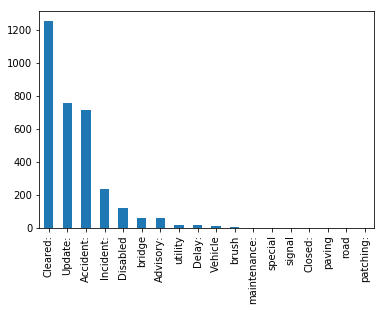

In [13]:
#plot = plt.figure(figsize=(400,800))
data.text.map(lambda x: x.split(' ')[0]).value_counts().plot(kind='bar')
plt.show()

In [14]:
data.text.map(lambda x: x.split(':')[0]).value_counts()

Cleared                     1252
Update                       756
Accident                     714
Incident                     237
Disabled Vehicle             111
Advisory                      58
bridge opening                57
utility work                  18
Delay                         17
Vehicle Fire                  15
Disabled Tractor Trailer      13
brush fire                     4
maintenance                    3
special event                  3
signal installation            2
bridge inspection              2
Closed                         1
paving operations              1
bridge work                    1
road widening work             1
patching                       1
Name: text, dtype: int64

In [15]:
data.to_excel('tweets_next.xlsx')

In [16]:
data[data.text.str.startswith(':')]

,created_at,id,screen_name,text


In [108]:
len(olddf.append(data))
dummy = pd.concat([data, olddf], ignore_index=True)
dummy = dummy.drop_duplicates('id')
len(dummy), dummy.index.has_duplicates

(6484, False)

In [82]:
dummy.text.iloc[1082] = 'Incident' + dummy.iloc[1082].text
dummy.iloc[1082].text

/mnt/c/Users/User/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


'Incident: NB on I-95 at MM89 in Hanover Co. No lanes closed.7:58PM'

In [18]:
dummy['col_cnt'] = dummy.text.map(lambda x:len(x.split(':')))

In [19]:
dummy.col_cnt.value_counts()

4    1979
3    1200
5      88
Name: col_cnt, dtype: int64

In [20]:
dummy[dummy.col_cnt == 3].head()

,created_at,id,screen_name,text,col_cnt
0,2017-11-16 23:52:20,931308990599979008,511centralva,Accident: SB on I-95 at MM75 in Richmond. Right shoulder closed.6:52PM,3
2,2017-11-16 23:52:20,931308987340992517,511centralva,Disabled Vehicle: SB on I-95 at MM75 in Richmond. No lanes closed.6:52PM,3
5,2017-11-16 23:40:17,931305957505847296,511centralva,Accident: NB on US-17 at MM112 in Essex Co. No lanes closed.6:40PM,3
6,2017-11-16 23:36:23,931304974671368192,511centralva,Disabled Vehicle: WB on I-64 at MM218 in New Kent Co. 1 travel lane closed.6:36PM,3
8,2017-11-16 23:22:24,931301456132562944,511centralva,Accident: NB on I-95 at MM78 in Richmond. Right shoulder closed.6:22PM,3


In [21]:
dummy[dummy.col_cnt == 4].head()

,created_at,id,screen_name,text,col_cnt
1,2017-11-16 23:52:20,931308988968214528,511centralva,Update: Accident: SB on US-17 at MM112 in Essex Co. No lanes closed.6:52PM,4
3,2017-11-16 23:52:19,931308985784946688,511centralva,Cleared: Accident: NB on US-17 at MM119 in Essex Co.6:52PM,4
4,2017-11-16 23:50:26,931308511312666625,511centralva,Cleared: Disabled Vehicle: WB on I-64 at MM218 in New Kent Co.6:50PM,4
7,2017-11-16 23:26:27,931302475562344448,511centralva,Cleared: Accident: WB on I-64 at MM187 in Richmond.6:24PM,4
12,2017-11-16 23:06:31,931297456817606658,511centralva,Cleared: Accident: NB on I-95 at MM87 in Hanover Co.6:06PM,4


In [22]:
dummy[dummy.col_cnt == 3]['text'].map(lambda x: x.split(':')[0]).value_counts()

Accident                    714
Incident                    237
Disabled Vehicle            111
bridge opening               57
utility work                 18
Delay                        17
Vehicle Fire                 15
Disabled Tractor Trailer     13
brush fire                    4
special event                 3
maintenance                   3
signal installation           2
bridge inspection             2
paving operations             1
bridge work                   1
patching                      1
road widening work            1
Name: text, dtype: int64

In [23]:
dummy[dummy.col_cnt == 4]['text'].map(lambda x: x.split(':')[0]).value_counts()

Cleared     1193
Update       727
Advisory      58
Closed         1
Name: text, dtype: int64

In [24]:
dummy[dummy.col_cnt == 5]['text'].map(lambda x: x.split(':')[0]).value_counts()

Cleared    59
Update     29
Name: text, dtype: int64

In [25]:
dummy[dummy.col_cnt == 5]['text']

356                                                       Cleared: Advisory: Other Weather: WB on Rt. 625W at MM1 in Hanover Co.6:33PM
400                                                     Cleared: Advisory: Standing Water: NB on Rt. 621N at MM0 in New Kent Co.1:52PM
401                                                   Cleared: Advisory: Other Weather: NB on Rt. 660N at MM5 in Mecklenburg Co.1:48PM
492                                                     Cleared: Advisory: Other Weather: NB on Rt. 650W (Bell Rd) in Amelia Co.9:22PM
493                                     Update: Advisory: Other Weather: NB on Rt. 650W (Bell Rd) in Amelia Co. No lanes closed.9:20PM
577                                         Cleared: Advisory: Other Weather: EB on SC-604 at Merry Point Ferry in Lancaster Co.9:52AM
578       Update: Advisory: Other Weather: EB on SC-604 at Merry Point Ferry in Lancaster Co. No lanes closed. Potential Delays.9:46AM
610                                                    

In [26]:
texts = dummy[dummy.text.str.contains('brush')]['text']

In [75]:
import re
pattern = re.compile(r'((?P<status>\w+): )?'
                     r'(?P<advisory>(Advisory|Closed): )?'
                     r'(?P<type>(\w*\s?)+): '
                     r'(?P<direction>[NEWS]B )?on '
                     r'(?P<hwy>.*)( at)? '
                     r'((?P<loc>.*)) in '
                     r'(?P<city>[A-Za-z0-9 ]+).'
                     r'(?P<comment>[a-zA-Z0-9\.&;/ ]+.)?'
                     r'(?P<time>\d+:\d+[AP]M)$'
                    )

In [76]:
attrs = ['status', 'type', 'direction', 'hwy', 'loc', 'city', 'comment', 'time']
for a in attrs:
    t = 'Update: Accident: EB on I-64 at MM199 in Henrico Co. All travel lanes closed. Delay 1 mi.5:52PM'
    t = 'Cleared: Accident: WB on I-64 at MM187 in Richmond.6:24PM'
    print(f'{a} -> {pattern.match(t).group(a)}')

status -> Cleared
type -> Accident
direction -> WB 
hwy -> I-64 at
loc -> MM187
city -> Richmond
comment -> None
time -> 6:24PM


In [131]:
dummy.iloc[1520]
dummy.drop(1520, inplace=True)

In [147]:
dummy.drop(1519, inplace=True)
dummy.iloc[1519]

created_at                                                        2017-11-07 13:50:25
id                                                                 927896021925023750
screen_name                                                              511centralva
text           Accident: NB on I-195 at MM3 in Richmond. Right shoulder closed.8:50AM
status                                                                           None
type                                                                         Accident
direction                                                                         NB 
hwy                                                                          I-195 at
loc                                                                               MM3
city                                                                         Richmond
comment                                                        Right shoulder closed.
time                                                  

In [161]:
dummy.iloc[1518]

created_at                                                                                                                                 2017-11-07 13:50:26
id                                                                                                                                          927896023451783168
screen_name                                                                                                                                       511centralva
text           maintenance: On Diascund Road North and South at Hockaday Road in New Kent Co. All NB &amp; all SB travel lanes closed. Potential Delays.8:50AM
status                                                                                                                                                     NaN
type                                                                                                                                                       NaN
direction                                     

In [162]:
dummy.drop(1518, inplace=True)

In [164]:
dummy.drop(1527, inplace=True)
dummy.drop(1528, inplace=True)

In [165]:
dummy[dummy.text.str.contains('Diascund')]

,created_at,id,screen_name,text,status,type,direction,hwy,loc,city,comment,time
1146,2017-11-09 21:34:22,928737552491835392,511centralva,Cleared: maintenance: NB On Diascund Road North and South at Hockaday Road in New Kent Co.4:34PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
for idx in dummy.index:
    if idx%500 == 0:
        print(idx)
    try:
        m = pattern.match(dummy.loc[idx,'text'])
        for a in attrs:
            dummy.loc[idx,a] = m.group(a)
    except AttributeError:
        #if 'Water' not in t and 'opening' not in t:
        print (dummy.loc[idx,'text'])
        #print(out)
    #print ('-'*40)

0
500
Cleared: Incident: NB (South Hopewell Street) in Hopewell.4:52PM
Incident: NB (South Hopewell Street) in Hopewell. No lanes closed.4:26PM
1000
Cleared: maintenance: NB On Diascund Road North and South at Hockaday Road in New Kent Co.4:34PM
1500
2000
2500
3000
3500
Update: bridge repair: EB On Scotts Road East and West between Canton Road and Level Green Road in Henrico Co. All EB &amp; all WB travel10:32PM
bridge repair: On Scotts Road East and West between Canton Road and Level Green Road in Henrico Co. All EB &amp; all WB travel lanes close9:52PM
4000
bridge work: at Gwynn's Island Bridge in Mathews Co. All NB &amp; all SB travel lanes closed. Potential Delays.11:26AM
4500
Cleared: bridge repair: EB On Scotts Road East and West between Canton Road and Level Green Road in Henrico Co.9:58AM
Cleared: Incident: SB (Coleman Memorial Bridge) in Gloucester Co.8:08AM
Incident: SB (Coleman Memorial Bridge) in Gloucester Co. No lanes closed.7:30AM
5000
5500
6000
6500


In [205]:
import seaborn as sns
#plt.style.use('seaborn-talk')
plt.style.use('fivethirtyeight')

In [192]:
dummy.tail()

,created_at,id,screen_name,text,status,type,direction,hwy,loc,city,comment,time
6513,2017-09-21 06:36:24,910754565540151296,511centralva,Update: Incident: NB on I-95 at MM75 in Richmond. 1 SB travel lane closed.2:36AM,Update,Incident,NB,I-95 at,MM75,Richmond,1 SB travel lane closed.,2:36AM
6514,2017-09-21 06:24:24,910751549248466944,511centralva,Incident: NB on I-95 at MM75 in Richmond. No lanes closed.2:24AM,None,Incident,NB,I-95 at,MM75,Richmond,No lanes closed.,2:24AM
6515,2017-09-21 05:44:25,910741486081384448,511centralva,Cleared: bridge opening: NB on VA-156 at B. Harrison Bridge in Prince George Co.1:44AM,Cleared,bridge opening,NB,VA-156 at B. Harrison,Bridge,Prince George Co,None,1:44AM
6516,2017-09-21 05:32:19,910738441587101697,511centralva,bridge opening: on VA-156 at B. Harrison Bridge in Prince George Co. All NB &amp; all SB travel lanes closed. Potential Delays.1:32AM,None,bridge opening,None,VA-156 at B. Harrison,Bridge,Prince George Co,All NB &amp; all SB travel lanes closed. Potential Delays.,1:32AM
6517,2017-09-21 03:10:25,910702730670374914,511centralva,Cleared: Incident: NB on I-95 at MM54 in Colonial Heights.11:10PM,Cleared,Incident,NB,I-95 at,MM54,Colonial Heights,None,11:10PM


In [177]:
dummy.status.hasnans, dummy.type.hasnans

(True, False)

In [176]:
for idx in dummy[dummy.type.isnull()].index:
    dummy.drop(idx, inplace=True)

In [183]:
reports = dummy[dummy.status.isnull()]
len(reports)

2348

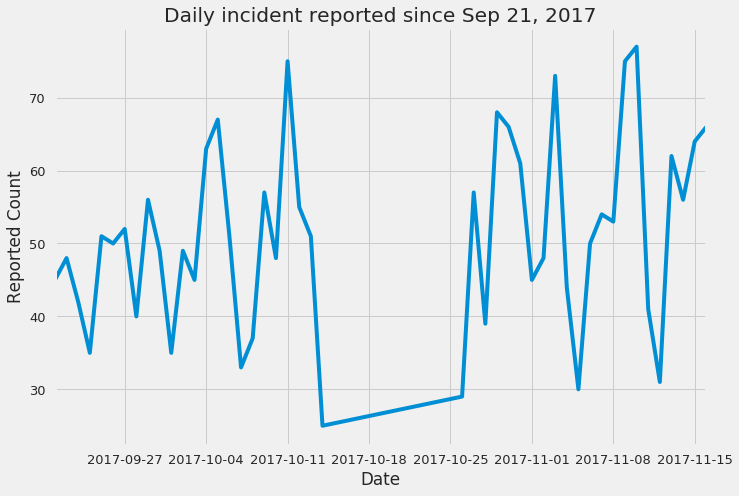

In [206]:
reports.created_at.dt.date.value_counts().plot()
plt.title('Daily incident reported since Sep 21, 2017')
plt.ylabel('Reported Count')
plt.xlabel('Date')
plt.show()

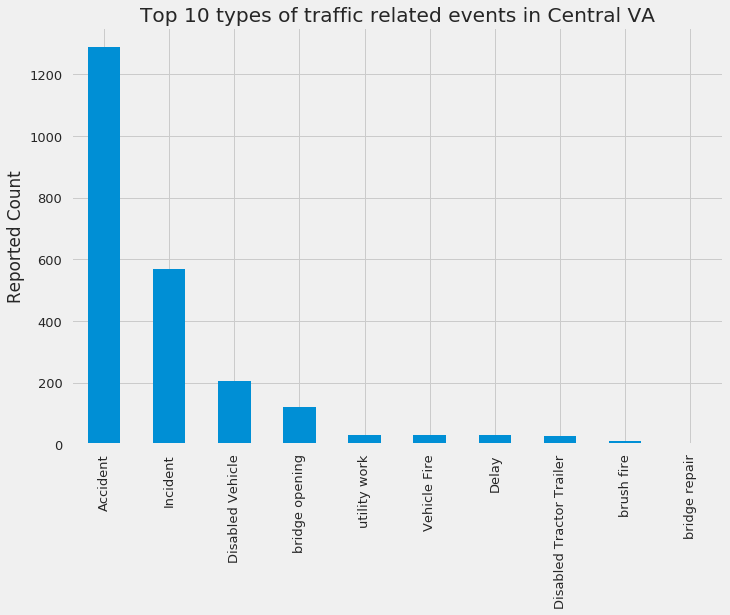

In [302]:
reports.type.value_counts(dropna=False)[:10].plot(kind='bar')
plt.ylabel('Reported Count')
plt.title('Top 10 types of traffic related events in Central VA')
plt.show()

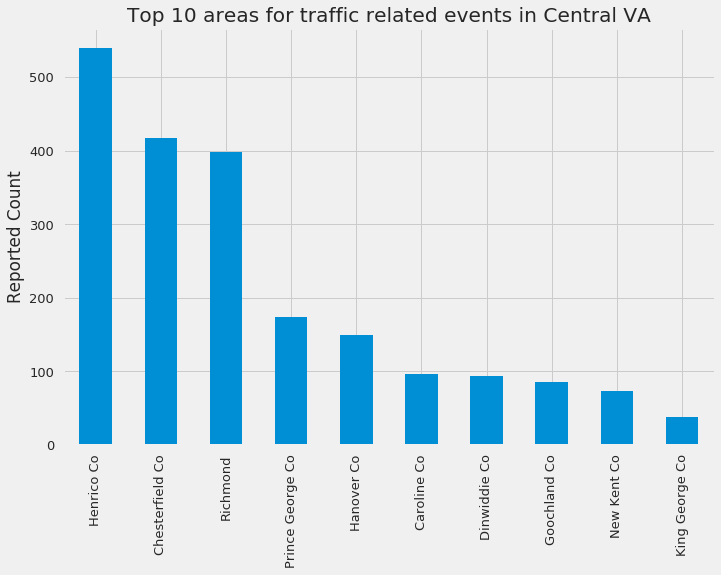

In [303]:
reports.city.value_counts(dropna=False)[:10].plot(kind='bar')
plt.ylabel('Reported Count')
plt.title('Top 10 areas for traffic related events in Central VA')
plt.show()

In [222]:
temp = reports.groupby(['type', 'city'])['id'].count().sort_values(ascending=False)[:20].to_frame()
temp.head()

id
type     city                
Accident Henrico Co       281
         Richmond         246
         Chesterfield Co  222
Incident Henrico Co       147
         Chesterfield Co  141

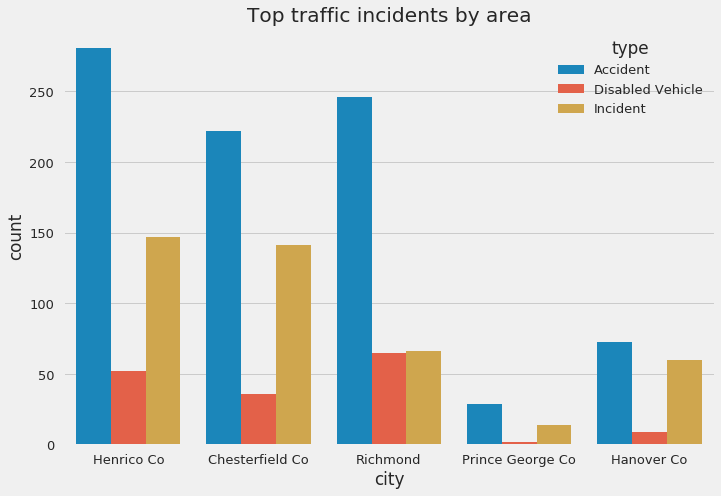

In [246]:
def hitype(x):
    return (x in ['Accident', 'Incident', 'Disabled Vehicle'])
#reports.groupby(['type', 'city'])['id'].count().sort_values(ascending=False)[:20].plot.bar(stacked=True)
#temp.unstack('type').plot.bar()# order=.value_counts().iloc[:10].index)
sns.countplot(data=reports[reports.type.map(hitype)], x='city', hue='type', order=reports.city.value_counts().iloc[:5].index)
plt.title('Top traffic incidents by area')
plt.show()

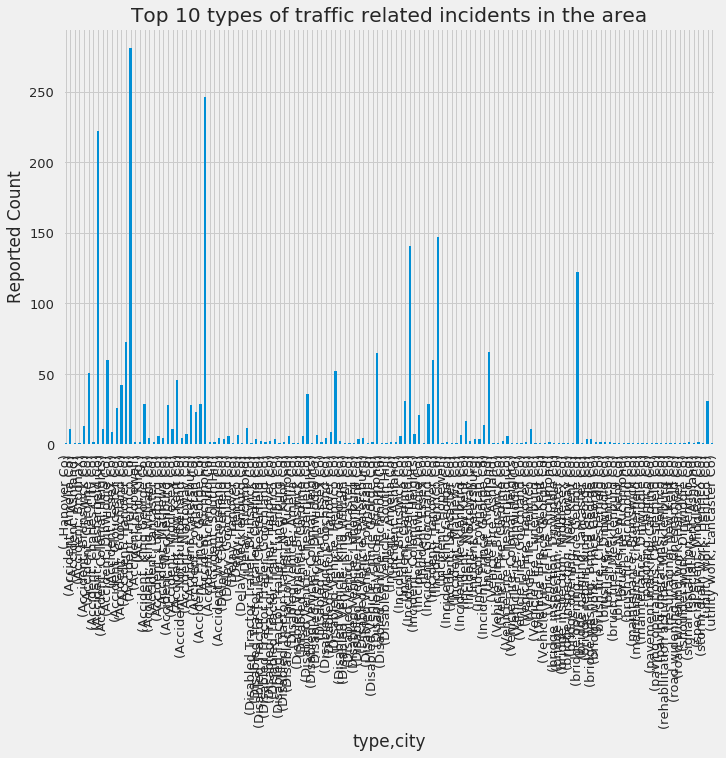

In [210]:
reports.groupby(['type', 'city'])['id'].count().plot.bar()
#.type.value_counts(dropna=False)[:10]
plt.ylabel('Reported Count')
plt.title('Top 10 types of traffic related incidents in the area')
plt.show()

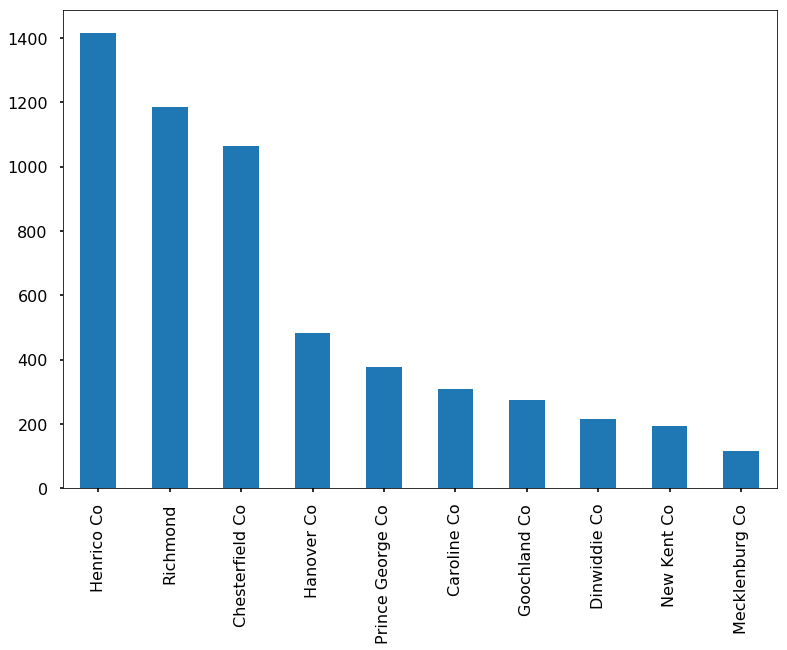

In [172]:
dummy.city.value_counts(dropna=False)[:10].plot(kind='bar')
plt.show()

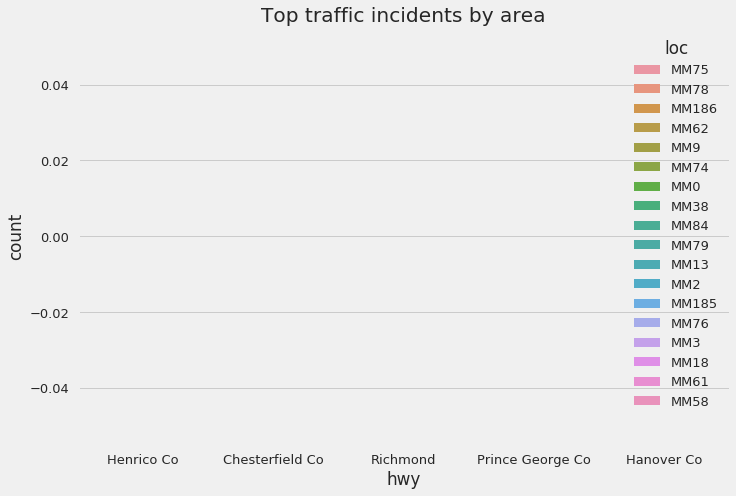

In [259]:
def hitype(x):
    return (x in ['Accident', 'Incident', 'Disabled Vehicle'])

def hiloc(x):
    return x in ('MM74','MM78','MM76','MM75','MM9','MM79','MM185','MM13','MM18','MM2','MM61','MM3','MM58','MM62','MM0','MM84','MM38','MM186')

#reports.groupby(['type', 'city'])['id'].count().sort_values(ascending=False)[:20].plot.bar(stacked=True)
#temp.unstack('type').plot.bar()# order=.value_counts().iloc[:10].index)
sns.countplot(data=reports[reports.type.map(hitype) & reports['loc'].map(hiloc)], x='hwy', hue='loc', order=reports.city.value_counts().iloc[:5].index)
plt.title('Top traffic incidents by area')
plt.show()

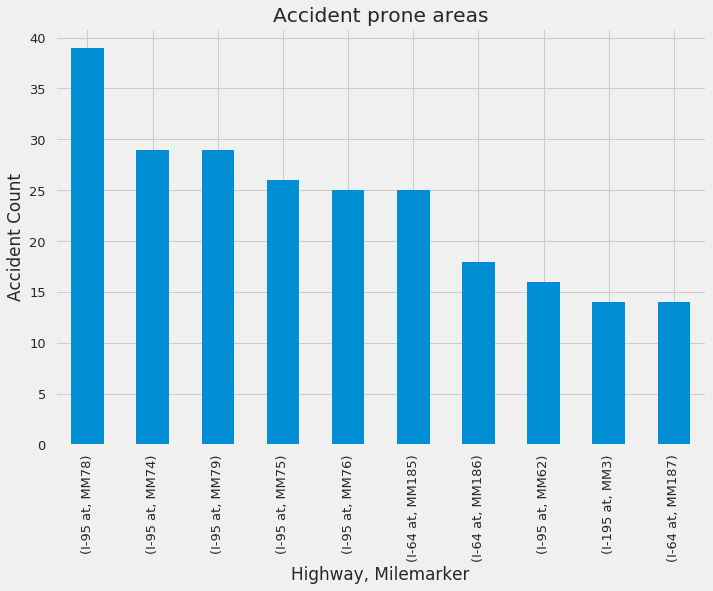

In [263]:
reports[reports.type == 'Accident'].groupby(['hwy','loc'])['id'].count().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Accident prone areas')
plt.xlabel('Highway, Milemarker')
plt.ylabel('Accident Count')
plt.show()

In [264]:
type(reports)

pandas.core.frame.DataFrame

In [265]:
reports.head()

,created_at,id,screen_name,text,status,type,direction,hwy,loc,city,comment,time
0,2017-11-16 23:52:20,931308990599979008,511centralva,Accident: SB on I-95 at MM75 in Richmond. Right shoulder closed.6:52PM,None,Accident,SB,I-95 at,MM75,Richmond,Right shoulder closed.,6:52PM
2,2017-11-16 23:52:20,931308987340992517,511centralva,Disabled Vehicle: SB on I-95 at MM75 in Richmond. No lanes closed.6:52PM,None,Disabled Vehicle,SB,I-95 at,MM75,Richmond,No lanes closed.,6:52PM
5,2017-11-16 23:40:17,931305957505847296,511centralva,Accident: NB on US-17 at MM112 in Essex Co. No lanes closed.6:40PM,None,Accident,NB,US-17 at,MM112,Essex Co,No lanes closed.,6:40PM
6,2017-11-16 23:36:23,931304974671368192,511centralva,Disabled Vehicle: WB on I-64 at MM218 in New Kent Co. 1 travel lane closed.6:36PM,None,Disabled Vehicle,WB,I-64 at,MM218,New Kent Co,1 travel lane closed.,6:36PM
8,2017-11-16 23:22:24,931301456132562944,511centralva,Accident: NB on I-95 at MM78 in Richmond. Right shoulder closed.6:22PM,None,Accident,NB,I-95 at,MM78,Richmond,Right shoulder closed.,6:22PM


In [268]:
reports['dt'] = pd.to_datetime(reports.time)
reports['itime'] = reports.dt.hour()

/mnt/c/Users/User/miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


AttributeError: 'Series' object has no attribute 'hour'

In [269]:
reports['dt'].dt.time()

TypeError: 'Series' object is not callable

In [276]:
reports['hour'] = reports['dt'].dt.hour

/mnt/c/Users/User/miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [277]:
reports.head()

,created_at,id,screen_name,text,status,type,direction,hwy,loc,city,comment,time,dt,hour
0,2017-11-16 23:52:20,931308990599979008,511centralva,Accident: SB on I-95 at MM75 in Richmond. Right shoulder closed.6:52PM,None,Accident,SB,I-95 at,MM75,Richmond,Right shoulder closed.,6:52PM,2017-11-17 18:52:00,18
2,2017-11-16 23:52:20,931308987340992517,511centralva,Disabled Vehicle: SB on I-95 at MM75 in Richmond. No lanes closed.6:52PM,None,Disabled Vehicle,SB,I-95 at,MM75,Richmond,No lanes closed.,6:52PM,2017-11-17 18:52:00,18
5,2017-11-16 23:40:17,931305957505847296,511centralva,Accident: NB on US-17 at MM112 in Essex Co. No lanes closed.6:40PM,None,Accident,NB,US-17 at,MM112,Essex Co,No lanes closed.,6:40PM,2017-11-17 18:40:00,18
6,2017-11-16 23:36:23,931304974671368192,511centralva,Disabled Vehicle: WB on I-64 at MM218 in New Kent Co. 1 travel lane closed.6:36PM,None,Disabled Vehicle,WB,I-64 at,MM218,New Kent Co,1 travel lane closed.,6:36PM,2017-11-17 18:36:00,18
8,2017-11-16 23:22:24,931301456132562944,511centralva,Accident: NB on I-95 at MM78 in Richmond. Right shoulder closed.6:22PM,None,Accident,NB,I-95 at,MM78,Richmond,Right shoulder closed.,6:22PM,2017-11-17 18:22:00,18


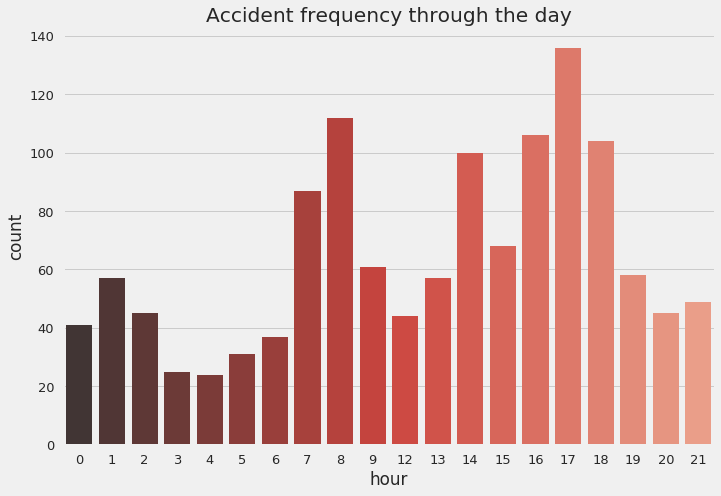

In [306]:
#acc = reports[reports.type == 'Accident'].groupby('hour')['type'].to_frame()
#acc
sns.countplot(data=reports[reports.type == 'Accident'], x='hour', palette='Reds_d')
plt.title('Accident frequency through the day')
plt.show()

In [42]:
for t in dummy['text'][1525:1530]:
    print(t)

Cleared: Accident: SB on I-95 at MM74 in Richmond.9:02AM
Update: Accident: SB on I-95 at MM74 in Richmond. No lanes closed.8:54AM
Update: maintenance: NB On Diascund Road North and South at Hockaday Road in New Kent Co. All NB &amp; all SB travel lanes closed. Potenti8:54AM
maintenance: On Diascund Road North and South at Hockaday Road in New Kent Co. All NB &amp; all SB travel lanes closed. Potential Delays.8:50AM
Accident: NB on I-195 at MM3 in Richmond. Right shoulder closed.8:50AM


In [51]:
i = 1528
#pattern.match(dummy['text'][i]), 
dummy['text'][i]

'maintenance: On Diascund Road North and South at Hockaday Road in New Kent Co. All NB &amp; all SB travel lanes closed. Potential Delays.8:50AM'

In [52]:
dummy[dummy.text.str.contains('aintenance')]

,created_at,id,screen_name,text,col_cnt
141,2017-11-16 05:14:14,931027611798724608,511centralva,Cleared: maintenance: SB on VA-46 (Christanna Hwy) in Brunswick Co.12:14AM,4
157,2017-11-16 00:44:21,930959690154078208,511centralva,maintenance: SB on VA-46 (Christanna Hwy) in Brunswick Co. All travel lanes closed. Potential Delays.7:44PM,3
1146,2017-11-09 21:34:22,928737552491835392,511centralva,Cleared: maintenance: NB On Diascund Road North and South at Hockaday Road in New Kent Co.4:34PM,4
1527,2017-11-07 13:54:19,927897001404129280,511centralva,Update: maintenance: NB On Diascund Road North and South at Hockaday Road in New Kent Co. All NB &amp; all SB travel lanes closed. Potenti8:54AM,4
1528,2017-11-07 13:50:26,927896023451783168,511centralva,maintenance: On Diascund Road North and South at Hockaday Road in New Kent Co. All NB &amp; all SB travel lanes closed. Potential Delays.8:50AM,3
2500,2017-10-31 01:08:28,925167555513323520,511centralva,Cleared: maintenance: WB on US-460 (W Cox Rd) in Dinwiddie Co.9:08PM,4
2556,2017-10-30 20:04:20,925091018348867585,511centralva,Update: maintenance: WB on US-460 (W Cox Rd) in Dinwiddie Co. 1 travel lane closed. Potential Delays.4:04PM,4
2565,2017-10-30 18:44:18,925070875552043008,511centralva,maintenance: WB on US-460 (W Cox Rd) in Dinwiddie Co. All travel lanes closed. Potential Delays.2:44PM,3


In [67]:
dummy.drop(1528, inplace=True)

In [61]:
pattern1 = re.compile(r'((?P<status>\w+): )?'
                     r'(?P<advisory>(Advisory|Closed): )?'
                     r'(?P<type>(\w*\s?)+): '
                     r'(?P<direction>.*)? [oO]n '
                     r'(?P<hwy>.*)( at)? '
                     r'((?P<loc>.*)) in '
                     r'(?P<city>[A-Za-z0-9 ]+).'
                     r'(?P<comment>[a-zA-Z0-9\.&;/ ]+.)'
                     r'(?P<time>\d+:\d+[AP]M)$'
                    )

In [62]:
pattern1.match(dummy['text'][i])

KeyboardInterrupt: 

In [ ]:
from functools import partial

In [142]:
def extract(pos, txt):
    try:
        if 'at ' in txt:
            return re.match(patgat,txt).groups()[pos] 
        else:
            return re.match(patg,txt).groups()[pos]
    except AttributeError:
        return '-'

In [143]:
extract0 = partial(extract, 0)
extract1 = partial(extract, 1)
extract2 = partial(extract, 2)
extract3 = partial(extract, 3)
extract4 = partial(extract, 4)
extract5 = partial(extract, 5)

In [145]:
#dummy['status'] = ''
#dummy[dummy.col_cnt == 4]['status'] = 
dummy[dummy.col_cnt == 4]['text'].map(extract0)
dummy.tail()

,created_at,id,screen_name,text,col_cnt,status
3246,2017-09-21 06:36:24,910754565540151296,511centralva,Update: Incident: NB on I-95 at MM75 in Richmond. 1 SB travel lane closed.2:36AM,4,
3247,2017-09-21 06:24:24,910751549248466944,511centralva,Incident: NB on I-95 at MM75 in Richmond. No lanes closed.2:24AM,3,
3248,2017-09-21 05:44:25,910741486081384448,511centralva,Cleared: bridge opening: NB on VA-156 at B. Harrison Bridge in Prince George Co.1:44AM,4,
3249,2017-09-21 05:32:19,910738441587101697,511centralva,bridge opening: on VA-156 at B. Harrison Bridge in Prince George Co. All NB &amp; all SB travel lanes closed. Potential Delays.1:32AM,3,
3250,2017-09-21 03:10:25,910702730670374914,511centralva,Cleared: Incident: NB on I-95 at MM54 in Colonial Heights.11:10PM,4,


status:

In [148]:
x = 'Update: Accident: SB on I-95 at MM71 in Richmond. No lanes closed. Delay 2 mi.6:18PM'
#x = 'Update: Accident: SB on VA-288 at MM14 in Chesterfield Co. 1 travel lane closed. Delay 2 mi.6:32PM'
#x = 'Update: Advisory: Other Weather: NB on Rt. 604N at MM2 in Lancaster Co. All NB &amp; all SB travel lanes closed.1:52PM'
x = 'Cleared: Accident: NB on US-17 (George Washington Memorial Hwy) in Gloucester Co.1:30PM'
import re
pat = r'\w+: \w+: .*\.\d+:\d+[AP]M'
patgat = r'(\w+): (\w+): (\w+) on (.*) at (.*) in ([A-Za-z ]+\.)(.*)(\d+:\d+[AP]M)'
patg = r'(\w+): (\w+): (\w+) on (.*) in ([A-Za-z ]+\.)(.*)(\d+:\d+[AP]M)'
pattern = r'^((\w+): )+(\w+) on (.*) (at (.*))? in ([A-Za-z ]+\.)(.*)(\d+:\d+[AP]M)$'
o = re.match(patg, x)

In [157]:
re.match(pattern, dummy.text.iloc[3246]).groups()

('Incident: ',
 'Incident',
 'NB',
 'I-95',
 'at MM75',
 'MM75',
 'Richmond.',
 ' 1 SB travel lane closed.',
 '2:36AM')

In [151]:
dummy.text.iloc[3247]

'Incident: NB on I-95 at MM75 in Richmond. No lanes closed.2:24AM'

In [325]:
for _ in dummy[dummy.text.str.contains(r'Standing Water')]['text']:
    print(_)

Update: Closed: Standing Water: NB on Rt. 708N at MM0 in Hanover Co. All NB &amp; all SB travel lanes closed. Potential Delays.11:18PM
Cleared: Closed: Standing Water: WB on Rt. 608W at MM2 in Hanover Co.6:12PM
Cleared: Closed: Standing Water: NB on Rt. 722N at MM1 in Hanover Co.4:50PM
Cleared: Advisory: Standing Water: NB on Rt. 656N at MM5 in Caroline Co.12:38PM
Cleared: Advisory: Standing Water: EB on Rt. 658N (Goshen Rd) in Hanover Co.10:48AM
Cleared: Advisory: Standing Water: EB on Rt. 663E at MM1 in Caroline Co.10:46AM
Update: Advisory: Standing Water: EB on Rt. 663E at MM1 in Caroline Co. No lanes closed.10:44AM
Cleared: Advisory: Standing Water: NB on Rt. 658N at MM4 in Hanover Co.10:42AM
Cleared: Advisory: Standing Water: NB on Rt. 671N (Coatesville Rd) in Hanover Co.10:42AM
Cleared: Advisory: Standing Water: NB on Rt. 715N (Clazemont Rd) in Hanover Co.10:38AM
Advisory: Standing Water: EB on Rt. 658N (Goshen Rd) in Hanover Co. No lanes closed.10:38AM
Cleared: Advisory: Standin

In [60]:
dummy[dummy.text.str.contains('bridge ')]

,created_at,id,screen_name,text,col_cnt
37,2017-10-14 11:40:23,919165990151311360,511centralva,Cleared: bridge opening: NB on VA-156 at B. Harrison Bridge in Prince George Co.7:40AM,4
38,2017-10-14 11:24:21,919161954496929792,511centralva,bridge opening: on VA-156 at B. Harrison Bridge in Prince George Co. All NB &amp; all SB travel lanes closed. Potential Delays.7:24AM,3
46,2017-10-14 08:22:23,919116157931675648,511centralva,Cleared: bridge opening: NB on VA-156 at B. Harrison Bridge in Prince George Co.4:22AM,4
47,2017-10-14 08:06:22,919112127436255232,511centralva,bridge opening: on VA-156 at B. Harrison Bridge in Prince George Co. All NB &amp; all SB travel lanes closed. Potential Delays.4:06AM,3
55,2017-10-14 01:10:25,919007451348979712,511centralva,Cleared: bridge opening: NB on VA-156 at B. Harrison Bridge in Prince George Co.9:10PM,4
57,2017-10-14 00:58:25,919004433396240384,511centralva,bridge opening: on VA-156 at B. Harrison Bridge in Prince George Co. All NB &amp; all SB travel lanes closed. Potential Delays.8:58PM,3
62,2017-10-13 23:42:19,918985282426425344,511centralva,Cleared: bridge opening: NB on VA-156 at B. Harrison Bridge in Prince George Co.7:42PM,4
66,2017-10-13 23:26:19,918981252451065858,511centralva,bridge opening: on VA-156 at B. Harrison Bridge in Prince George Co. All NB &amp; all SB travel lanes closed. Potential Delays.7:26PM,3
123,2017-10-13 15:42:17,918864477352640512,511centralva,Cleared: bridge opening: NB on VA-156 at B. Harrison Bridge in Prince George Co.11:42AM,4
126,2017-10-13 15:12:26,918856964255502336,511centralva,Update: bridge opening: NB on VA-156 at B. Harrison Bridge in Prince George Co. All NB &amp; all SB travel lanes closed. Potential Delays11:12AM,4


In [62]:
sample = js[-1]

In [63]:
sample._json

{'contributors': None,
 'coordinates': None,
 'created_at': 'Thu Sep 21 03:10:25 +0000 2017',
 'entities': {'hashtags': [], 'symbols': [], 'urls': [], 'user_mentions': []},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 910702730670374914,
 'id_str': '910702730670374914',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="http://www.511virginia.org/" rel="nofollow">VA511 auto app Central</a>',
 'text': 'Cleared: Incident: NB on I-95 at MM54 in Colonial Heights.11:10PM',
 'truncated': False,
 'user': {'contributors_enabled': False,
  'created_at': 'Tue Nov 03 20:34:31 +0000 2009',
  'default_profile': False,
  'default_profile_image': False,
  'description': 'Travel conditions for the Richmond, Petersburg, Hopewell & Colonial Heights area

In [146]:
from rply import LexerGenerator

In [147]:
lg = LexerGenerator()

In [ ]:
lg.add(tokebs
      `
      )

In [ ]:
lexer = lg.build()

In [ ]:
iterator = lexer.kex()`

In [ ]:
iterator.next()

In [20]:
api.user_timeline?

In [32]:
import numpy as np

from bokeh.plotting import figure, output_notebook, show
from bokeh.models import LogColorMapper, LogTicker, ColorBar

#output_file('color_bar.html')
output_notebook()

def normal2d(X, Y, sigx=1.0, sigy=1.0, mux=0.0, muy=0.0):
    z = (X-mux)**2 / sigx**2 + (Y-muy)**2 / sigy**2
    return np.exp(-z/2) / (2 * np.pi * sigx * sigy)

X, Y = np.mgrid[-3:3:100j, -2:2:100j]
Z = normal2d(X, Y, 0.1, 0.2, 1.0, 1.0) + 0.1*normal2d(X, Y, 1.0, 1.0)
image = Z * 1e6

color_mapper = LogColorMapper(palette="Viridis256", low=1, high=1e7)

plot = figure(x_range=(0,1), y_range=(0,1), toolbar_location=None)
plot.image(image=[image], color_mapper=color_mapper,
           dh=[1.0], dw=[1.0], x=[0], y=[0])

color_bar = ColorBar(color_mapper=color_mapper, ticker=LogTicker(),
                     label_standoff=12, border_line_color=None, location=(0,0))

plot.add_layout(color_bar, 'right')

show(plot)

Loading BokehJS ...

In [330]:
from rply import LexerGenerator
lg = LexerGenerator()

In [ ]:
#x = 'Update: Accident: SB on I-95 at MM71 in Richmond. No lanes closed. Delay 2 mi.6:18PM'
#x = 'Update: Accident: SB on VA-288 at MM14 in Chesterfield Co. 1 travel lane closed. Delay 2 mi.6:32PM'
#x = 'Update: Advisory: Other Weather: NB on Rt. 604N at MM2 in Lancaster Co. All NB &amp; all SB travel lanes closed.1:52PM'
#x = 'Cleared: Accident: NB on US-17 (George Washington Memorial Hwy) in Gloucester Co.1:30PM'
lg.ignore(r'\s+')
lg.add("Update", "Update:")
lg.add("Accident", "Accident:")
lg.add("Cleared", "Cleared:")
lg.add("Advisory", "Advisory:")
lg.add("on", "on")
lg.add("in", "in")
lg.add("city")